In [1]:
#!pip install yellowbrick

In [2]:
pwd()

'/Users/ewelina/Desktop/Python_3/Udemy'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

pd.options.display.float_format = '{:0,.5f}'.format

## &#x1F331; <font color='lightblue'>Przygotowanie danych</font>

### <font color='lightblue' >Dane o sprzedaży mieszkań w King County</font>

In [131]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [132]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,"79,545.45857",5.68286,7.00919,4.09000,"23,086.80050","1,059,033.55787","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"79,248.64245",6.00290,6.73082,3.09000,"40,173.07217","1,505,890.91485","188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"61,287.06718",5.86589,8.51273,5.13000,"36,882.15940","1,058,987.98788","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,"63,345.24005",7.18824,5.58673,3.26000,"34,310.24283","1,260,616.80663",USS Barnett\nFPO AP 44820
4,"59,982.19723",5.04055,7.83939,4.23000,"26,354.10947","630,943.48934",USNS Raymond\nFPO AE 09386


In [133]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [134]:
USAhousing.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,"5,000.00000","68,583.10898","10,657.99121","17,796.63119","61,480.56239","68,804.28640","75,783.33867","107,701.74838"
Avg. Area House Age,"5,000.00000",5.97722,0.99146,2.64430,5.32228,5.97043,6.65081,9.51909
Avg. Area Number of Rooms,"5,000.00000",6.98779,1.00583,3.23619,6.29925,7.00290,7.66587,10.75959
Avg. Area Number of Bedrooms,"5,000.00000",3.98133,1.23414,2.00000,3.14000,4.05000,4.49000,6.50000
Area Population,"5,000.00000","36,163.51604","9,925.65011",172.61069,"29,403.92870","36,199.40669","42,861.29077","69,621.71338"
Price,"5,000.00000","1,232,072.65414","353,117.62658","15,938.65792","997,577.13505","1,232,669.37797","1,471,210.20421","2,469,065.59417"


In [135]:
#USAhousing[USAhousing.duplicated()]
USAhousing.duplicated().sum()

0

In [136]:
USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

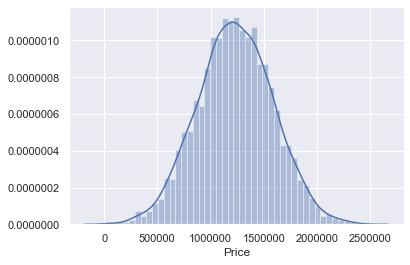

In [137]:
# Wizualizacja rozkladu zmiennej 'Price'
sns.distplot(USAhousing['Price'])

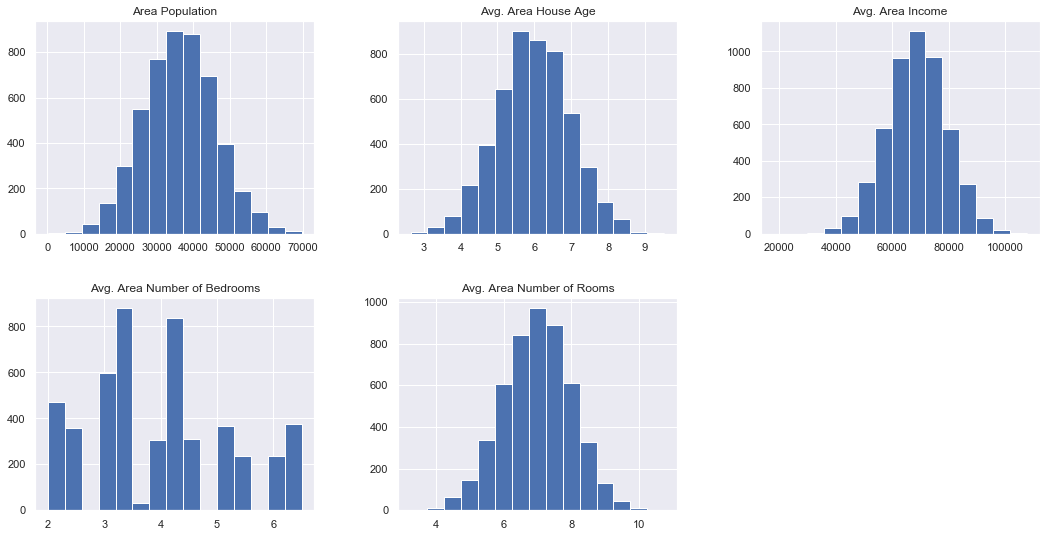

In [138]:
#sns.distplot(USAhousing['Area Population'])
numerical = ['Avg. Area Number of Rooms', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 
             'Area Population', 'Avg. Area Income']
USAhousing[numerical].hist(bins=15, figsize=(18, 9), layout=(2, 3));

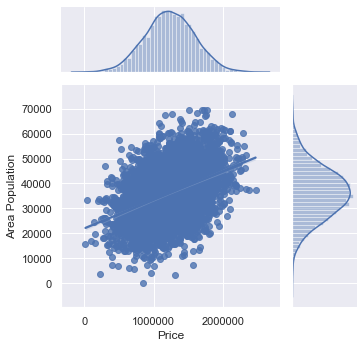

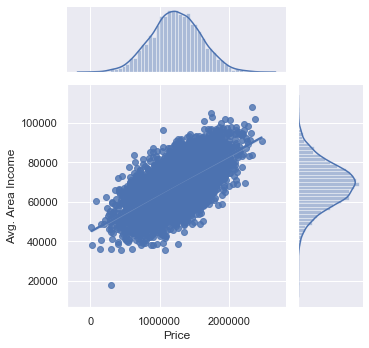

In [139]:
numerical = ['Area Population', 'Avg. Area Income']
sns.jointplot(x=USAhousing['Price'], y=USAhousing[numerical[0]], data=USAhousing, kind="reg", 
              height=5, ratio=3, color="b");
sns.jointplot(x=USAhousing['Price'], y=USAhousing[numerical[1]], data=USAhousing, kind="reg", 
              height=5, ratio=3, color="b");

In [ ]:
categorical =  ['Avg. Area Number of Rooms']
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Price', data=USAhousing, ax=subplot)

KeyboardInterrupt: 

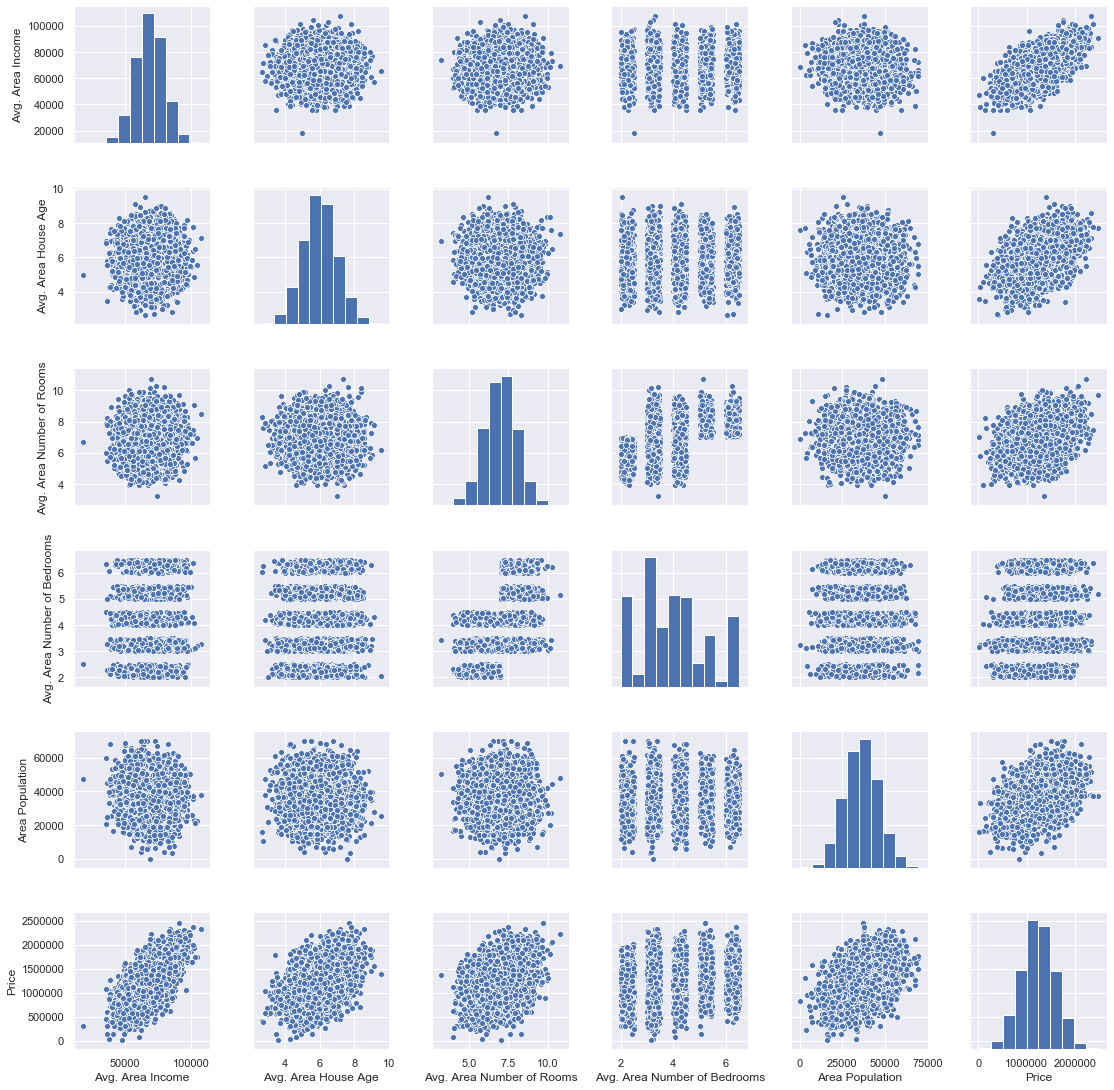

In [140]:
# Korelacja między zmiennymi
sns.pairplot(USAhousing)

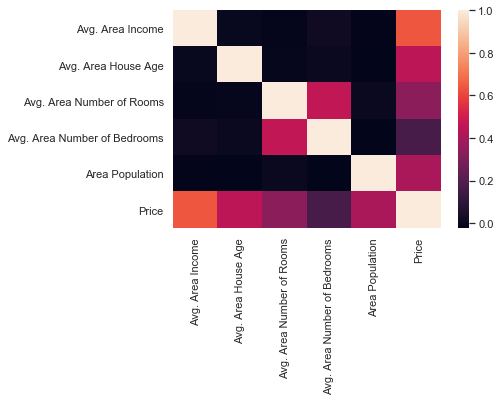

In [141]:
# Korelacja między zmiennymi
sns.heatmap(USAhousing.corr())

In [142]:
corr = USAhousing.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.00000,-0.00201,-0.01103,0.01979,-0.01623,0.63973
Avg. Area House Age,-0.00201,1.00000,-0.00943,0.00615,-0.01874,0.45254
Avg. Area Number of Rooms,-0.01103,-0.00943,1.00000,0.46269,0.00204,0.33566
Avg. Area Number of Bedrooms,0.01979,0.00615,0.46269,1.00000,-0.02217,0.17107
Area Population,-0.01623,-0.01874,0.00204,-0.02217,1.00000,0.40856
Price,0.63973,0.45254,0.33566,0.17107,0.40856,1.00000


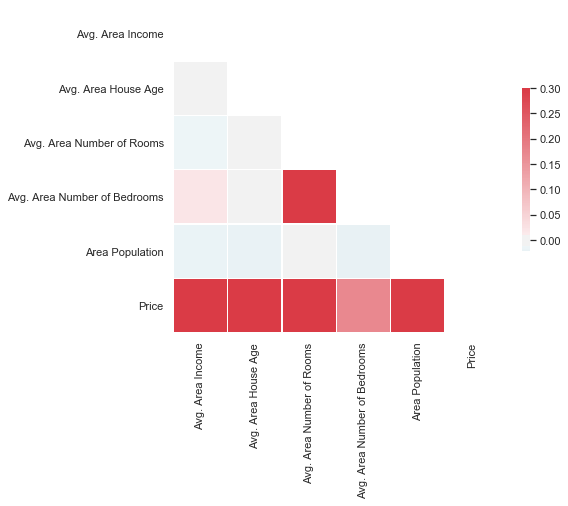

In [143]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [144]:
USAhousing.corr()['Price'].sort_values(ascending=False)

Price                          1.00000
Avg. Area Income               0.63973
Avg. Area House Age            0.45254
Area Population                0.40856
Avg. Area Number of Rooms      0.33566
Avg. Area Number of Bedrooms   0.17107
Name: Price, dtype: float64

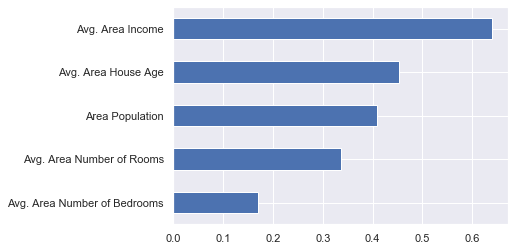

In [145]:
sns.set()
USAhousing.corr()['Price'].sort_values()[:-1].plot(kind='barh')

In [146]:
# Podział zmiennych na zmienną objaśnianą y i zmienne objaśniające X
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [147]:
y[:5]

0   1,059,033.55787
1   1,505,890.91485
2   1,058,987.98788
3   1,260,616.80663
4     630,943.48934
Name: Price, dtype: float64

In [148]:
X[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,"79,545.45857",5.68286,7.00919,4.09000,"23,086.80050"
1,"79,248.64245",6.00290,6.73082,3.09000,"40,173.07217"
2,"61,287.06718",5.86589,8.51273,5.13000,"36,882.15940"
3,"63,345.24005",7.18824,5.58673,3.26000,"34,310.24283"
4,"59,982.19723",5.04055,7.83939,4.23000,"26,354.10947"


## &#x1F34A; <font color='orange'>Przygotowanie danych do modelu</font>

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (3000, 5)
X_test shape: (2000, 5)
y_trian shape: (3000,)
y_test shape: (2000,)


## &#x1F34F; <font color='green'>Budowa modelu</font>

In [205]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.9177


In [207]:
print(regressor.intercept_)

-2640159.7968537393


In [208]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
#coeff_df_r = np.round(coeff_df, decimals=2)
print(coeff_df)

                               Coefficient
Avg. Area Income                  21.52828
Avg. Area House Age          164,883.28203
Avg. Area Number of Rooms    122,368.67803
Avg. Area Number of Bedrooms   2,233.80186
Area Population                   15.15042


## &#x1F34F; <font color='green'>Predykcja</font>

In [209]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([1260960.7057,  827588.7556, 1742421.2425,  974625.3874,
        998717.842 ,  645754.0884, 1083215.9092,  855334.9487,
       1445671.4003, 1202846.0144])

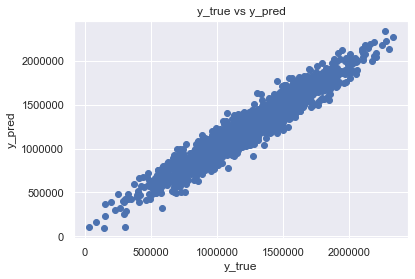

In [210]:
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks
f, ax = plt.subplots(figsize=(6, 4))
 
plt.title('y_true vs y_pred')  
plt.xlabel('y_true')  
plt.ylabel('y_pred')  
plt.scatter(y_test,y_pred)

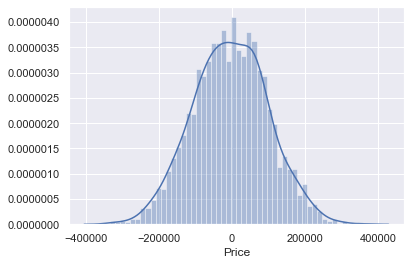

In [211]:
sns.distplot((y_test-y_pred),bins=50);

In [212]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
1718,"1,251,688.61570","1,260,960.70568","-9,272.08997"
2511,"873,048.31964","827,588.75560","45,459.56404"
345,"1,696,977.66283","1,742,421.24254","-45,443.57971"
2521,"1,063,964.28787","974,625.38740","89,338.90048"
54,"948,788.27571","998,717.84202","-49,929.56631"


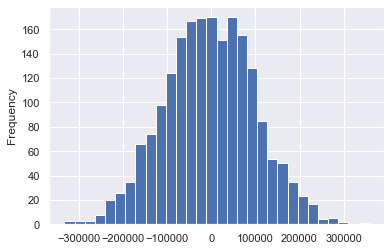

In [213]:
predictions.error.plot(kind='hist', bins=30)

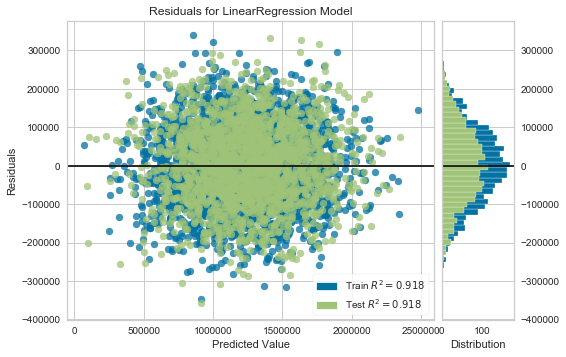

In [228]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [214]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'MAE wynosi: {mae:0,.2f}')
print(f'MSE wynosi: {mse:0,.2f}')
print(f'RMSE wynosi: {rmse:0,.2f}')

MAE wynosi: 82,288.22
MSE wynosi: 10,460,958,907.21
RMSE wynosi: 102,278.83


In [215]:
print(f'Intercept: {regressor.intercept_:0,.2f}')

Intercept: -2,640,159.80


In [216]:
regressor.coef_

array([    21.5283, 164883.282 , 122368.678 ,   2233.8019,     15.1504])

In [217]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [218]:
for a,b in zip(regressor.coef_,X.columns):
            print(f'{b:>28s} =  {a:>10,.2f}')

            Avg. Area Income =       21.53
         Avg. Area House Age =  164,883.28
   Avg. Area Number of Rooms =  122,368.68
Avg. Area Number of Bedrooms =    2,233.80
             Area Population =       15.15


## &#x1F34F; <font color='green'>Dobór cech modelu - eliminacja wsteczna</font>

In [219]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)

In [220]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6715.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:33:29   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.763e+04
Df Residuals:                    2994   BIC:                         7.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [192]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5]]
predictors.remove('Avg. Area Number of Bedrooms')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8391.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:30:48   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.762e+04
Df Residuals:                    2995   BIC:                         7.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## &#x1F34F; <font color='green'>Dobór cech modelu - eliminacja wsteczna - automatyzacja</font>

In [187]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    ols = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(ols.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if ols.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8391.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:30:34   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.762e+04
Df Residuals:                    2995   BIC:                         7.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [188]:
ols.save('model.USAhousing')

In [221]:
y_pred = ols.predict(X_test)
y_pred[:10]

ValueError: shapes (2000,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

In [222]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([1260960.7057,  827588.7556, 1742421.2425,  974625.3874,
        998717.842 ,  645754.0884, 1083215.9092,  855334.9487,
       1445671.4003, 1202846.0144])

In [223]:
y_test[:10]

1718   1,251,688.61570
2511     873,048.31964
345    1,696,977.66283
2521   1,063,964.28787
54       948,788.27571
2866     730,043.64506
2371   1,166,925.14615
2952     705,444.11679
45     1,499,988.87952
4653   1,288,199.15273
Name: Price, dtype: float64